## seaborn 막대그래프

###### 가장기본이 되는 막대 그래프 함수인 barplot()
- 다변량(여러개의 변수로 이루어진 데이터)
- #01. 기본 준비

In [2]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

그래프 전역 설정

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'  # windows 한글 지원 폰트 설정
# plt.rcParams["font.family"] = 'AppleGothic'  # mac 한글 지원 폰트 설정

plt.rcParams["font.size"] = 12               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (8, 5)    # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False   # 유니코드 뺄셈기호 표시 사용 안함(깨짐방지)

데이터 준비하기

In [4]:
성적표df = read_excel('https://data.hossam.kr/D01/grade.xlsx', index_col='이름')
성적표df

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
혜민,4,여자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,4,남자,91,90,89,80


3. 데이터 전처리

In [5]:
df = 성적표df.astype({"학년": "category", "성별": "category"})
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

#02. 막대 그래프 그리기
1. 기본 사용 방법
###### barplot()함수는 기본적으로 집계가 완료된 데이터를 시각화 한다.

###### x축에 지정된 항목이 중복되지 않는다면 각 집단별 집계결과를 표시한다.

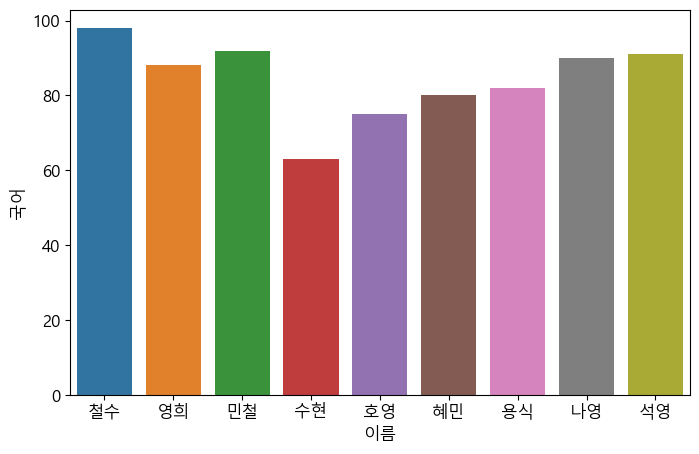

In [6]:
sb.barplot(data=df, x=df.index, y='국어')
plt.show()
plt.close()

2. 평균 막대 그래프
###### x축에 지정된 데이터에 중복된 값이 있다면 y축은 평균값을 표시한다.

그래프에 표시되는 막대는 95% 신뢰구간을 의미한다.

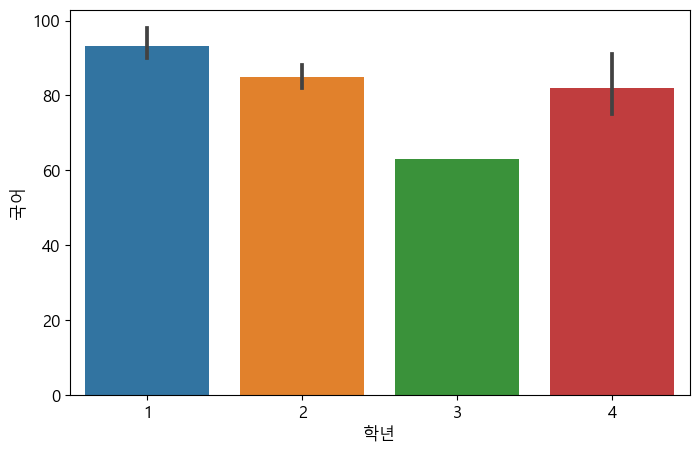

In [7]:
sb.barplot(data=df, x='학년', y='국어')
plt.show()
plt.close()

3. 다른 지표 적용하기
###### barplot() 함수에 estimator 파라미터를 적용하면 다른 지표를 표시할 수 있다.

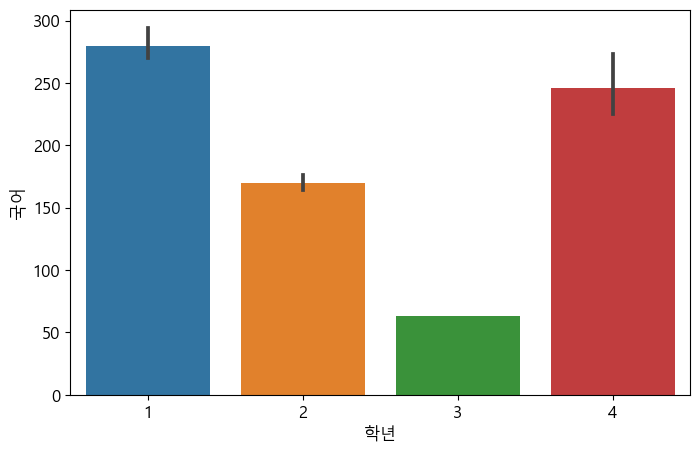

In [9]:
# 합계
sb.barplot(data=df, x='학년', y='국어', estimator='sum')
plt.show()
plt.close()

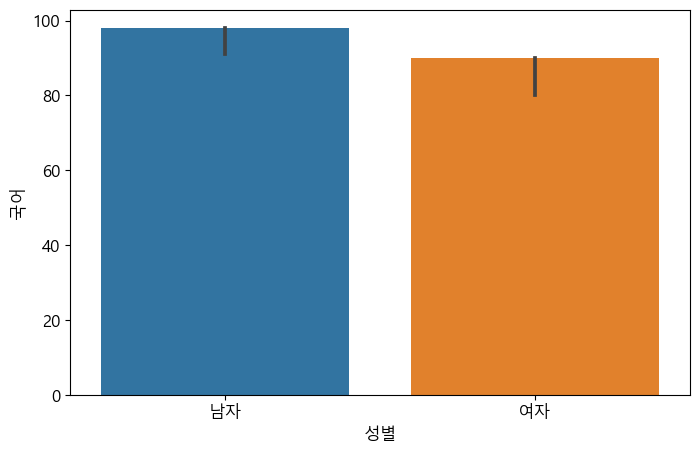

In [10]:
# 최대값
sb.barplot(data=df, x='성별', y='국어', estimator='max')
plt.show()
plt.close()

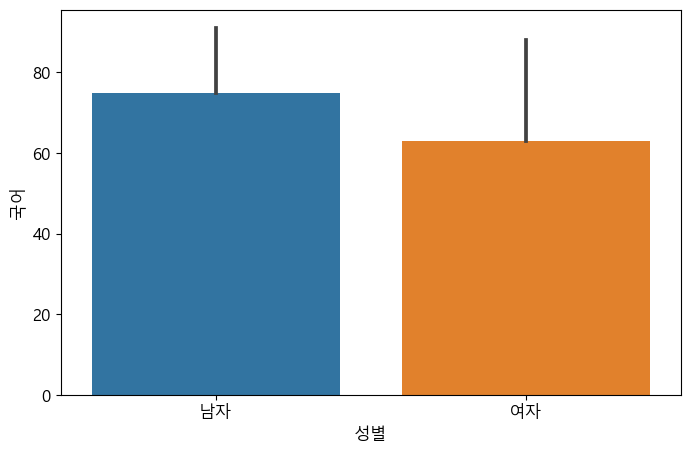

In [11]:
# 최소값
sb.barplot(data=df, x='성별', y='국어', estimator='min')
plt.show()
plt.close()

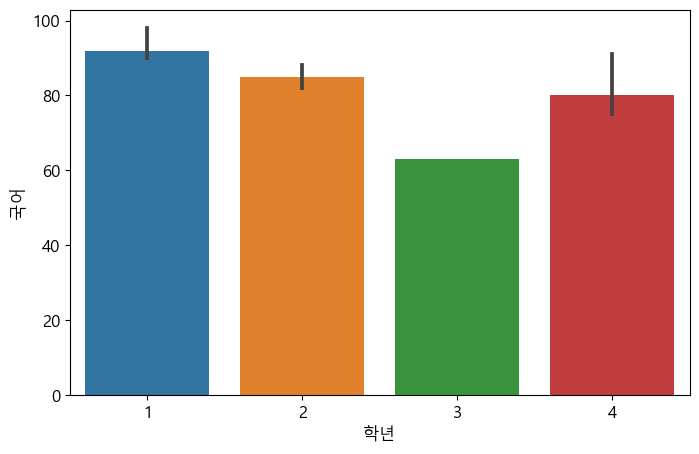

In [12]:
# 중앙값
sb.barplot(data=df, x='학년', y='국어', estimator='median')
plt.show()
plt.close()

#03 범주에 따른 구분

##### hue 파라미터의 적용

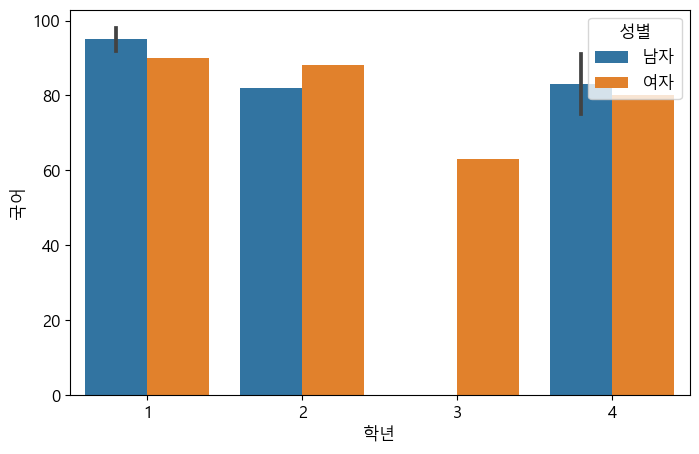

In [13]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.show()
plt.close()

범주 위치 옮기기

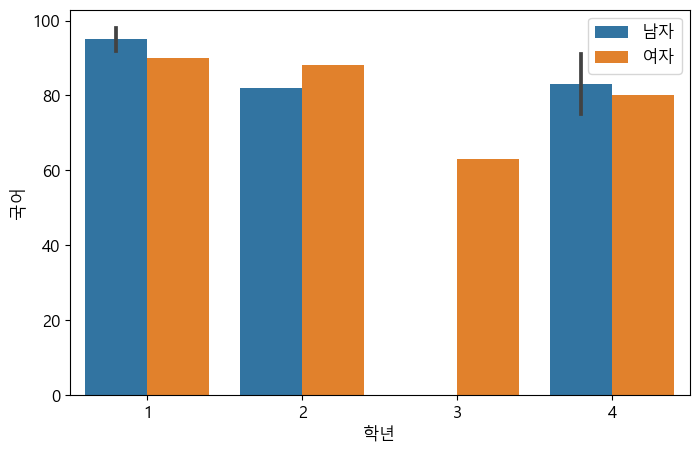

In [14]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
plt.close()

범주 적용을 위한 데이터 재배치

In [15]:
df1 = df.filter(['국어']).rename(columns={'국어': '점수'})
df1['과목'] = '국어'
df1

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


In [16]:
df2 = df.filter(['영어']).rename(columns={'영어': '점수'})
df2['과목'] = '영어'
df2

,점수,과목
이름,,
철수,77,영어
영희,120,영어
민철,70,영어
수현,60,영어
호영,50,영어
혜민,88,영어
용식,88,영어
나영,92,영어
석영,90,영어


In [19]:
from pandas import concat
df3 = concat([df1, df2])
df3

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


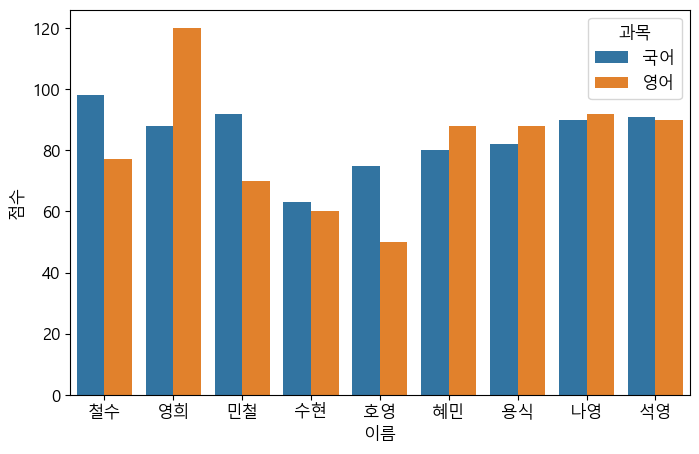

In [20]:
sb.barplot(data=df3, x=df3.index, y='점수', hue='과목')
plt.show()
plt.close()